In [1]:

# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="cf6yoFiRnumb8YCgAc7i2890Z"
consumer_secret = "V4cP4UqqoYjiyxV8gsK9n91Bztg4qCowhFGLcjngTYBX6BfbmO"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


access_token = "3377301250-JkIbLxJp5oYnJHCJ3SVvBaOezBgTNGTSfyFGDiV"
access_token_secret = "TDaatB09DV6RjStolXxMayzAe2o836U280xwyI4Z173yj"
auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

#Switching to application authentication
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

#Setting up new api wrapper, using authentication only
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
 
#Error handling
if (not api):
    print ("Problem Connecting to API")
else:
    print "Autenticado"

Autenticado


In [8]:
i= 0
total = 10000
all_tweets = []
for tweet in tweepy.Cursor(api.search,count=100,lang="es",geocode="-34.5916734896,-58.3918617027,3mi").items():
    i +=1
    if i % 1000 == 0:
        print i
    all_tweets.append(tweet)
    if i >= total:
        break
        

print len(all_tweets)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
10000


In [9]:
places_dict = {}
loc = {}
geos = 0

for tweet in all_tweets:
    if tweet.user.location != None:
        location = tweet.user.location
        loc[location] = 1 if not loc.has_key(location) else loc[location] +1
    if tweet.place != None:
        plc = tweet.place.name
        places_dict[plc] = 1 if not places_dict.has_key(plc) else places_dict[plc] + 1
    if tweet.user.geo_enabled:
        geos +=1

print "La cantidad total de tweets: "  + str(len(all_tweets))
print "La cantidad de usarios con geolocalizacion " + str(geos) + ", el %" + str(100.0*(geos)/(len(all_tweets)))

canti = 20
for w in sorted(loc, key=loc.get, reverse=True)[:canti]:
    print w, loc[w]


La cantidad total de tweets: 10000
La cantidad de usarios con geolocalizacion 5527, el %55.27
Buenos Aires, Argentina 3022
 1981
Buenos Aires 819
Argentina 346
Ciudad Autónoma de Buenos Aire 101
Buenos Aires  94
buenos aires 91
Buenos Aires - Argentina 84
Buenos Aires, Argentina. 72
Buenos Aires, Argentina  65
Florencio Varela  49
Argentina, Buenos Aires 48
Entre Ríos, Argentina 48
Buenos Aires Argentina 44
Córdoba, Argentina 37
argentina 37
Rosario, Argentina 34
Puerto Madryn, Argentina 31
Lomas de Zamora, Argentina 28
Buenos Aires. 27


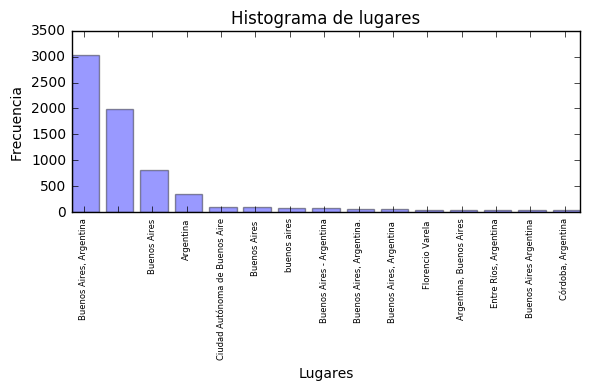

In [11]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(loc.keys()))
bar_width = 0.35


cant = 15
valores = sorted(loc.values(),reverse=True)
claves = sorted(loc, key=loc.get,reverse=True)

opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

In [160]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'': 
        cor.append(tweet)


for c in cor:
    if c.place != None: # o tiene geolocalizacion
        print 'GEO ' + (c._json['place']['name'])
    else:# o la persona de la que retwitteo tiene esa locacion
         print 'RETWEET ' + c.retweeted_status.user.location



RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires - Argentina
RETWEET Buenos Aires 
RETWEET Buenos Aires 
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina.
RETWEET buenos aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETW

In [161]:
import json
cor = []
for tweet in all_tweets:
    if tweet.user.location == u'Córdoba, Argentina': 
        cor.append(tweet)


for c in cor:
    if c.place != None: # o tiene geolocalizacion
        print 'GEO ' + (c._json['place']['name'])
    else:# o la persona de la que retwitteo tiene esa locacion
         print 'RETWEET ' + c.retweeted_status.user.location



RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET buenos aires
RETWEET Argentina Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires
GEO Ciudad Autónoma de Buenos Aires
RETWEET Buenos Aires
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Argentina
RETWEET Buenos Aires, Arge